In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

Python REPL can execute arbitrary code. Use with caution.


In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Strikeouts - {today}"

In [4]:
session_id = '07870565'

In [5]:
task = '''Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Plan'}}
----
Distance to neareast plan: 0.8255935907363892
Formulating a new plan based on User input
Modifying plan with function metadata
{'Plan': {'messages': [HumanMessage(content="Here is the updated plan to plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season:\n\n1. Use the playerid_lookup function to get Danny Duffy's 'key_mlbam' player ID by passing in his last name 'duffy' and first name 'danny'.\n\n2. Use the statcast_pitcher function to get Duffy's pitch-level data for the 2018 season. Pass in the following arguments:\n    - start_dt='2018-01-01' \n    - end_dt='2018-12-31'\n    - player_id=(Duffy's 'key_mlbam' from step 1)\n\n3. From the statcast_pitcher output, select only the 'game_date' and 'events' columns.\n\n4. Filter the 'events' column to only include rows where the result was a strikeout.\n\n5. Group the filtered data by 'game_date' and count the number of strikeouts per date. \n\n6. Sort the grouped data by 'game

In [6]:
task = '''Label the x-axis "Game Date" and the y-axis "Total K's"'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Revise'}}
----
{'Revise': {'messages': [HumanMessage(content='Here is the revised plan with the x and y axis labels updated:\n\n1. Use the playerid_lookup function to get Danny Duffy\'s \'key_mlbam\' player ID by passing in his last name \'duffy\' and first name \'danny\'.\n\n2. Use the statcast_pitcher function to get Duffy\'s pitch-level data for the 2018 season. Pass in the following arguments:\n    - start_dt=\'2018-01-01\'\n    - end_dt=\'2018-12-31\' \n    - player_id=(Duffy\'s \'key_mlbam\' from step 1)\n\n3. From the statcast_pitcher output, select only the \'game_date\' and \'events\' columns.\n\n4. Filter the \'events\' column to only include rows where the result was a strikeout.\n\n5. Group the filtered data by \'game_date\' and count the number of strikeouts per date.\n\n6. Sort the grouped data by \'game_date\'.\n\n7. Calculate the cumulative sum of the strikeout counts ordered by \'game_date\'.\n\n8. Plot the cumulative sum as a line chart, with

{'Orchestrate': {'next': 'Convert'}}
----
{'Convert': {'code': "\n# 1. Import necessary libraries\nfrom pybaseball import playerid_lookup, statcast_pitcher\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# 2. Get Danny Duffy's player ID\nduffy = playerid_lookup('duffy', 'danny')\nduffy_id = duffy.key_mlbam.values[0]\n\n# 3. Get Duffy's 2018 pitch-level data\nduffy_2018 = statcast_pitcher('2018-01-01', '2018-12-31', duffy_id)\n\n# 4. Select relevant columns and filter for strikeouts\nduffy_k = duffy_2018[['game_date', 'events']]\nduffy_k = duffy_k[duffy_k['events'].str.contains('strikeout')]\n\n# 5. Group by game date and count strikeouts\nduffy_k_counts = duffy_k.groupby('game_date').size().reset_index(name='k_count')\n\n# 6. Sort by game date\nduffy_k_counts = duffy_k_counts.sort_values('game_date')\n\n# 7. Calculate cumulative strikeout sum\nduffy_k_counts['cum_k'] = duffy_k_counts['k_count'].cumsum()\n\n# 8. Plot cumulative strikeout sum\nplt.figure(figsize=(12, 6))\nplt.pl

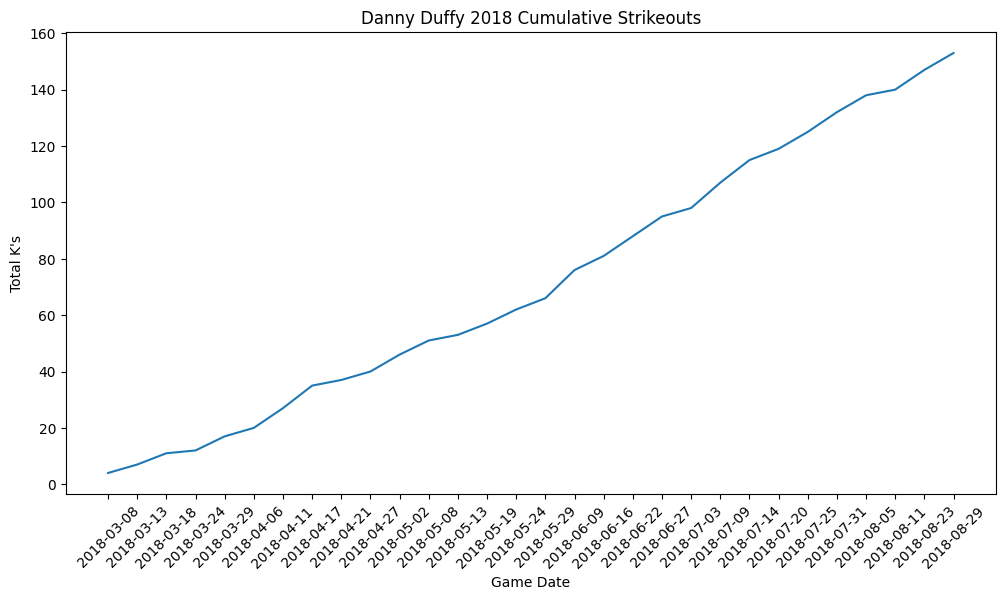

{'Execute': {'messages': [AIMessage(content="\nHere is the code that was used to reach this solution:\n```python\n\n# 1. Import necessary libraries\nfrom pybaseball import playerid_lookup, statcast_pitcher\nimport pandas as pd\nimport matplotlib.pyplot as plt\n# 2. Get Danny Duffy's player ID\nduffy = playerid_lookup('duffy', 'danny')\nduffy_id = duffy.key_mlbam.values[0]\n# 3. Get Duffy's 2018 pitch-level data\nduffy_2018 = statcast_pitcher('2018-01-01', '2018-12-31', duffy_id)\n\n# 4. Select relevant columns and filter for strikeouts\nduffy_k = duffy_2018[['game_date', 'events']]\nduffy_k = duffy_k[duffy_k['events'].notna() & duffy_k['events'].str.contains('strikeout')]\n\n# 5. Group by game date and count strikeouts\nduffy_k_counts = duffy_k.groupby('game_date').size().reset_index(name='k_count')\n# 6. Sort by game date\nduffy_k_counts = duffy_k_counts.sort_values('game_date')\n# 7. Calculate cumulative strikeout sum\nduffy_k_counts['cum_k'] = duffy_k_counts['k_count'].cumsum()\n# 8

In [7]:
task = "approved"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [8]:
task = "yes"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Memorize'}}
----
{'Memorize': {'messages': [AIMessage(content='Thank you, task has been commited to memory')], 'previous_node': 'Memorize'}}
----
Thank you, task has been commited to memory
